## Maps with pandas: GeoPandas

You can read in Shapefiles into python using GeoPandas which works a lot like our beloved Pandas.

In [1]:
# !pip install geopandas folium matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# ─────────────────────────────────────────────────────────────
# 1. Static Map: United States
# ─────────────────────────────────────────────────────────────

# Load the built-in world map and filter to the U.S.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [2]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


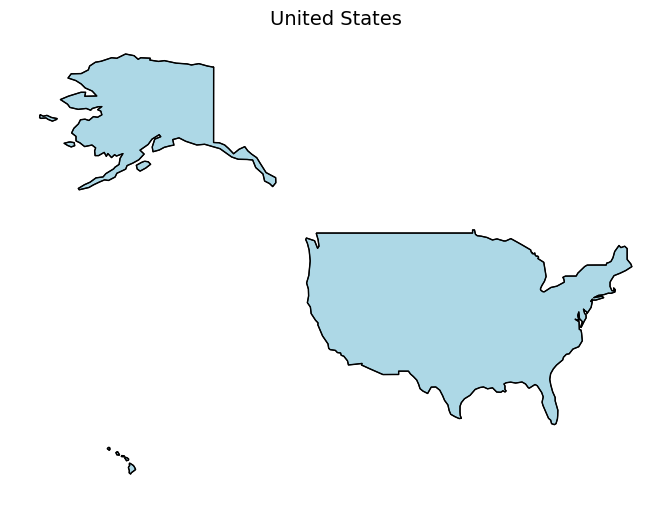

In [3]:
usa = world[world.name == "United States of America"]

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
usa.boundary.plot(ax=ax, color="black", linewidth=0.8)
usa.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_title("United States", fontsize=14)
ax.set_axis_off()
plt.show()

In [4]:
# ─────────────────────────────────────────────────────────────
# 2. Load Shapefile of U.S. States
# ─────────────────────────────────────────────────────────────

# Replace with your path to the shapefile (downloaded separately)
# Example: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
shp_path = "/Users/bilene/Downloads/us-states/us-states.shp"
states = gpd.read_file(shp_path)
print(states.head())


# ─────────────────────────────────────────────────────────────
# 3. Interactive Map: Base Map
# ─────────────────────────────────────────────────────────────

# Create a Folium map centered on the continental U.S.
m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="OpenStreetMap")

# Add GeoJSON layer with simple styling
folium.GeoJson(
    states,
    name="US States",
    tooltip=folium.features.GeoJsonTooltip(fields=["NAME"]),
    style_function=lambda x: {
        "fillColor": "#a6cee3",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.7
    }
).add_to(m)

m  # Display interactive map


  GEOID        NAME  population   age  \
0    01     Alabama   4903185.0  39.4   
1    02      Alaska    731545.0  35.0   
2    04     Arizona   7278717.0  38.3   
3    05    Arkansas   3017804.0  38.8   
4    06  California  39512223.0  37.0   

                                            geometry  
0  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
1  MULTIPOLYGON (((179.48132 51.97530, 179.58286 ...  
2  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  
3  POLYGON ((-94.61792 36.49941, -94.36120 36.499...  
4  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...  


In [27]:
import folium
import geopandas as gpd

# Load shapefile (replace with your path)
shp_path = "/Users/bilene/Downloads/us-states/us-states.shp"
states = gpd.read_file(shp_path)

# Example population data (if missing)
if "population" not in states.columns:
    import numpy as np
    np.random.seed(0)
    states["population"] = np.random.randint(0.5, 40, len(states)) * 1_000_000

# Create map
m_pop = folium.Map(location=[37.8, -96], zoom_start=4, tiles="CartoDB positron")

# Choropleth layer (color shading)
choropleth = folium.Choropleth(
    geo_data=states,
    data=states,
    columns=["NAME", "population"],
    key_on="feature.properties.NAME",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="Population",
    highlight=True
).add_to(m_pop)

# GeoJson layer with tooltip (hover info)
folium.GeoJson(
    states,
    name="Hover Info",
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.2,
        "fillOpacity": 0,
    },
    highlight_function=lambda x: {
        "weight": 2,
        "color": "yellow",
        "fillOpacity": 0.3,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["NAME", "population"],
        aliases=["State:", "Population:"],
        localize=True,
        sticky=True
    ),
).add_to(m_pop)

m_pop.save("us_map.html")

m_pop


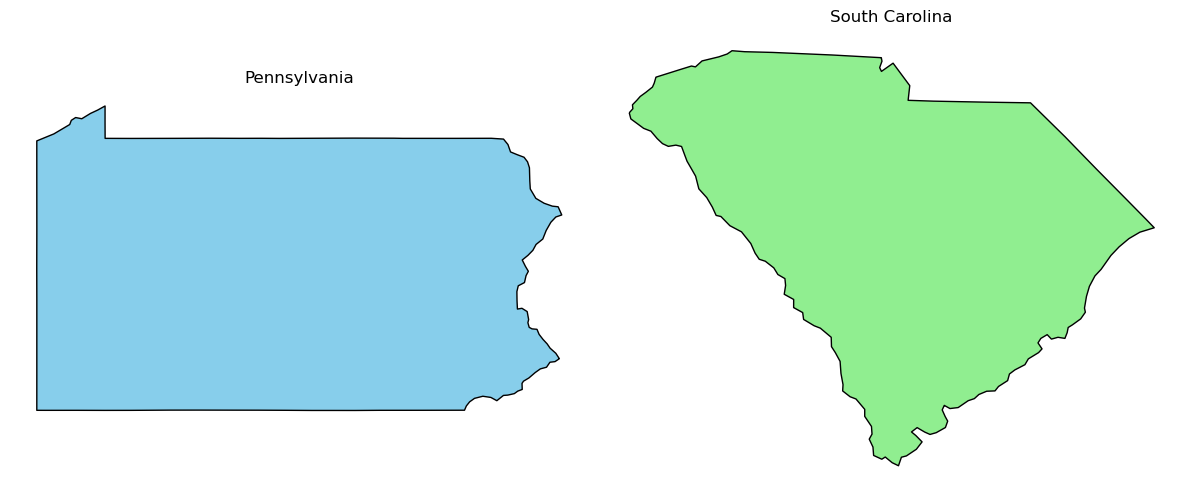

In [8]:

# ─────────────────────────────────────────────────────────────
# 5. Compare Two States
# ─────────────────────────────────────────────────────────────

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pennsylvania
states[states["NAME"] == "Pennsylvania"].plot(ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Pennsylvania")
axes[0].set_axis_off()

# South Carolina
states[states["NAME"] == "South Carolina"].plot(ax=axes[1], color="lightgreen", edgecolor="black")
axes[1].set_title("South Carolina")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()

